# Exercícios

1) Melhore a acurácia do modelo visto acima (usar um modelo melhor).

2) Use o dataset https://archive.ics.uci.edu/dataset/9/auto+mpg e derive o melhor modelo, analise as predições e calcule o erro do seu melhor modelo.

## 1-

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
c = wine_quality.data.original.color
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [ ]:
wine_quality.data.original

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
6492     11.2        6  white  
6493      9.6        5  white  
6494      9.4        6  white  
6495     12.8        7  white  
6496     11.8        6  white  

[6497 rows x 13 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df["colors"] = c
print(X_scaled_df.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol colors  
0 -0.915464    red  
1 -0.580068   

In [ ]:
import numpy as np
import pymc as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt

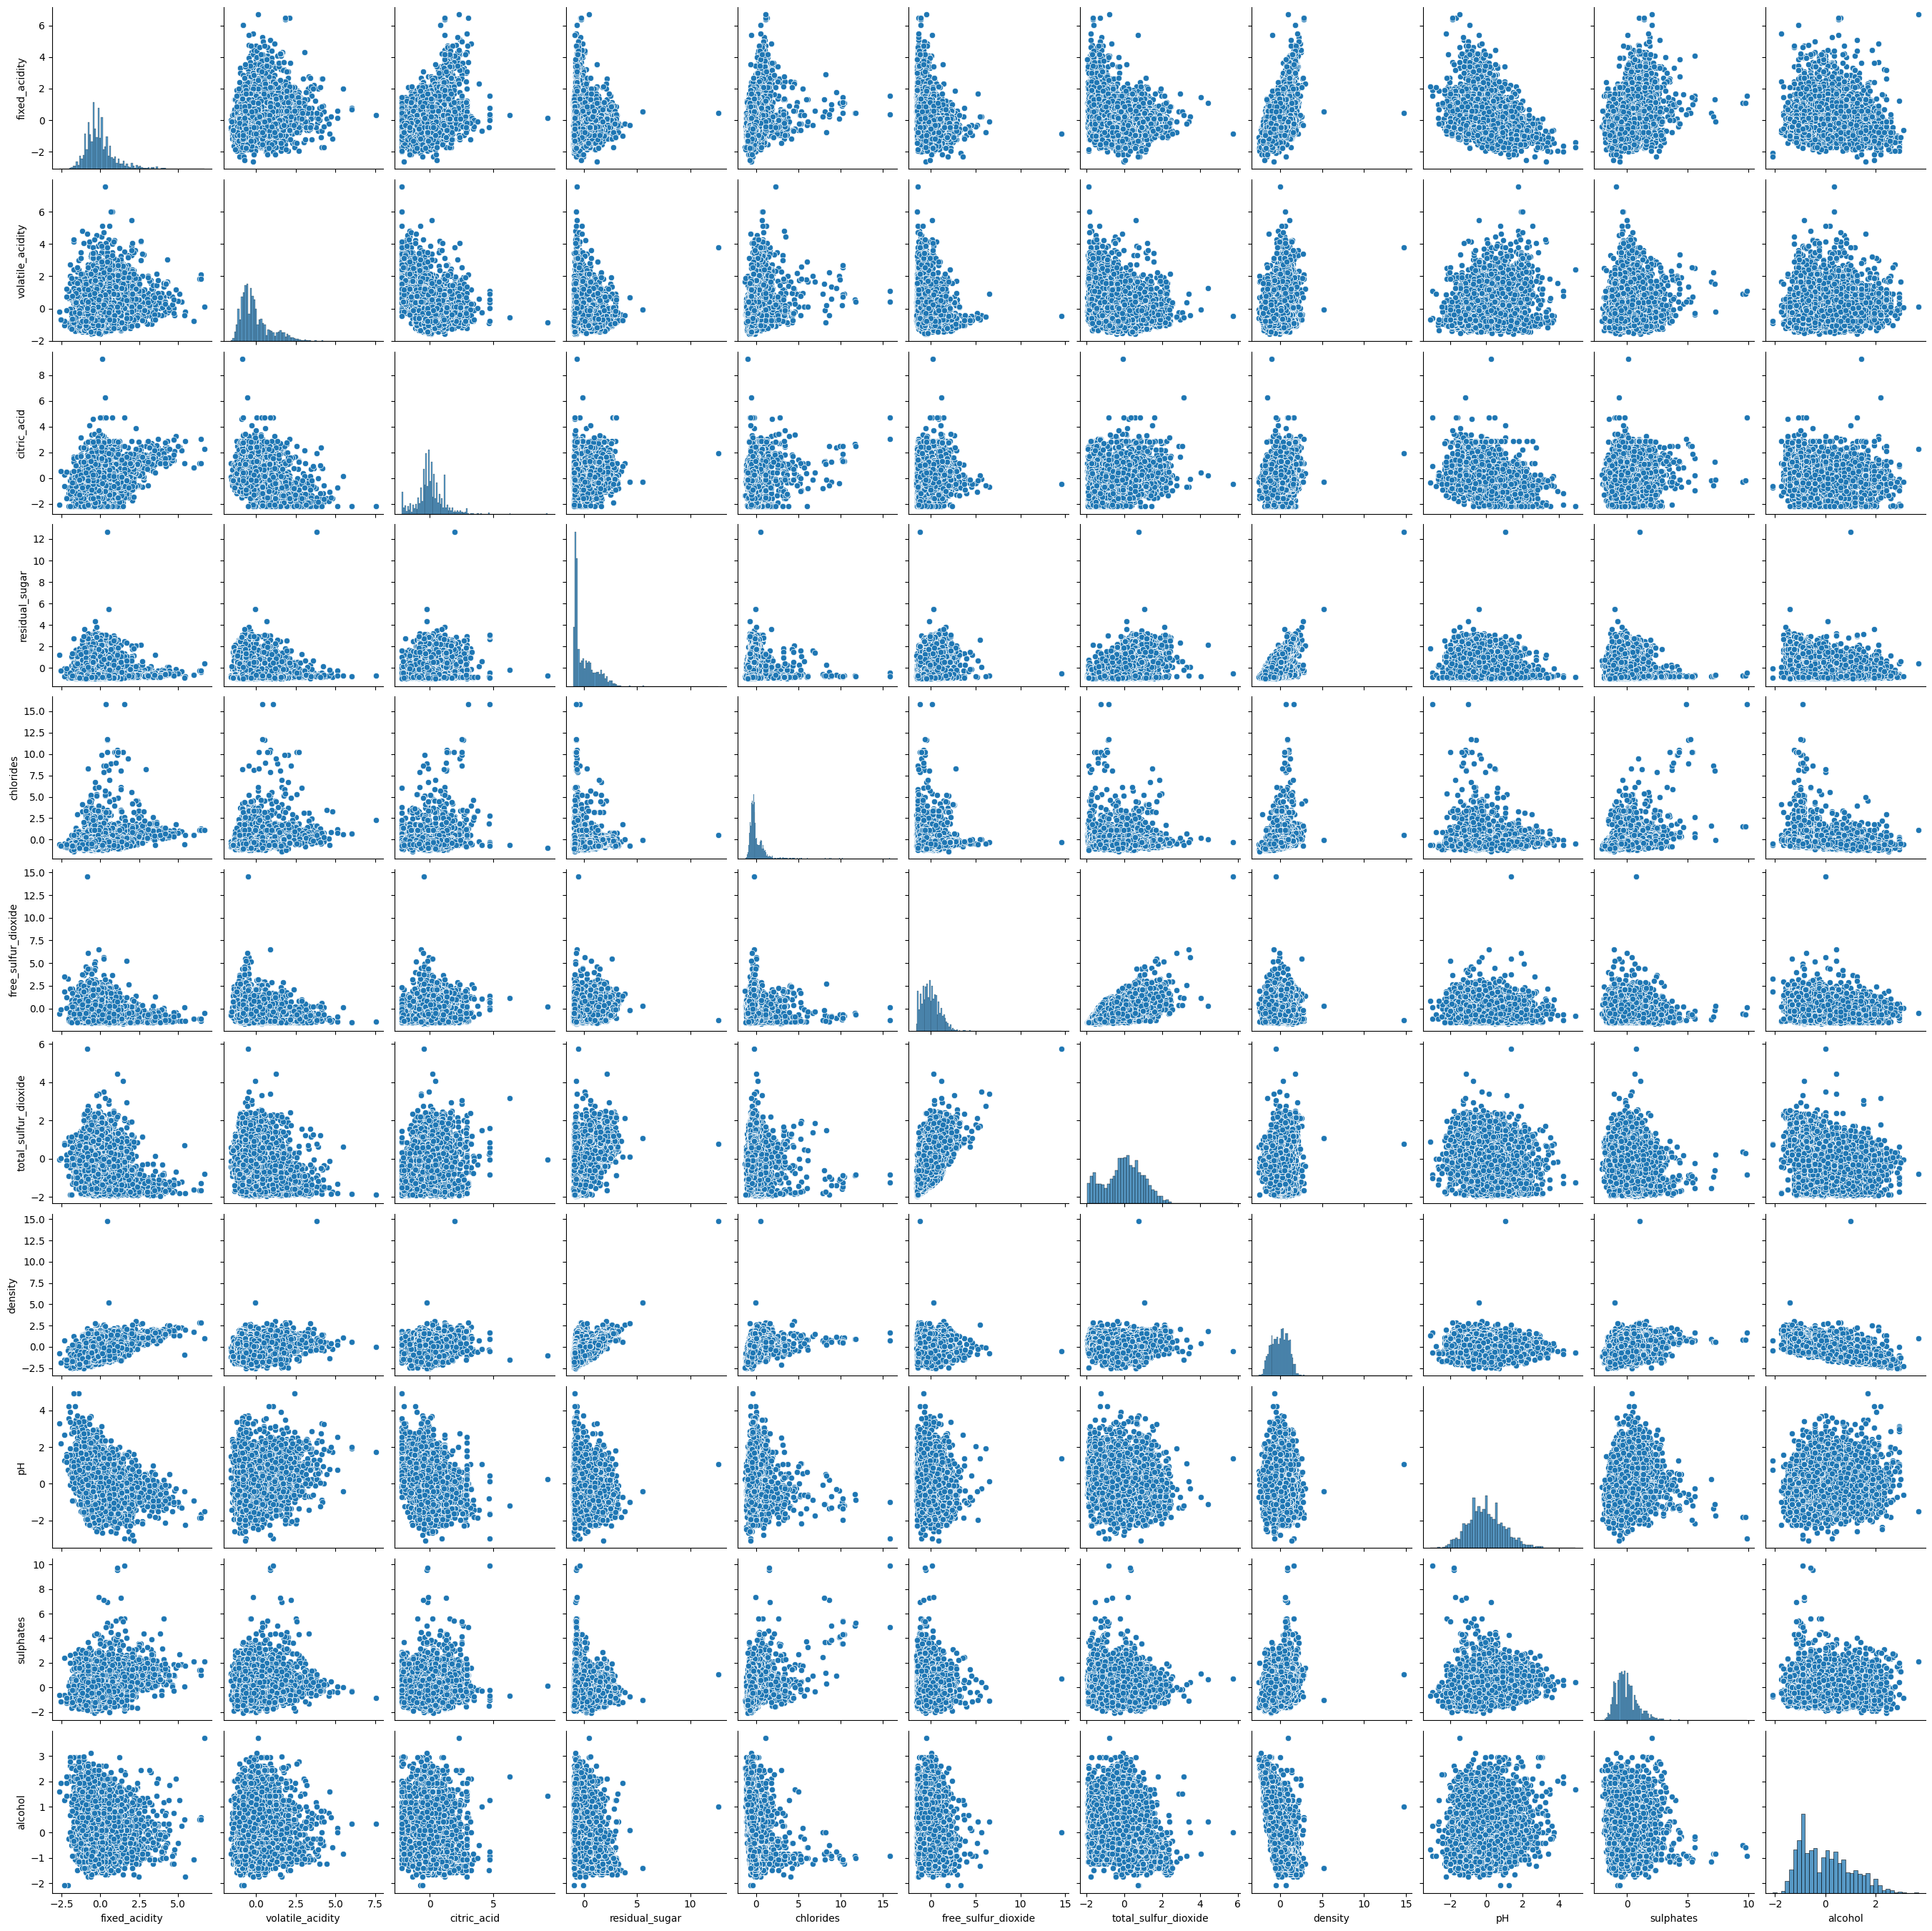

<ipython-input-93-c38e41b9f4d6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = X_scaled_df.corr()


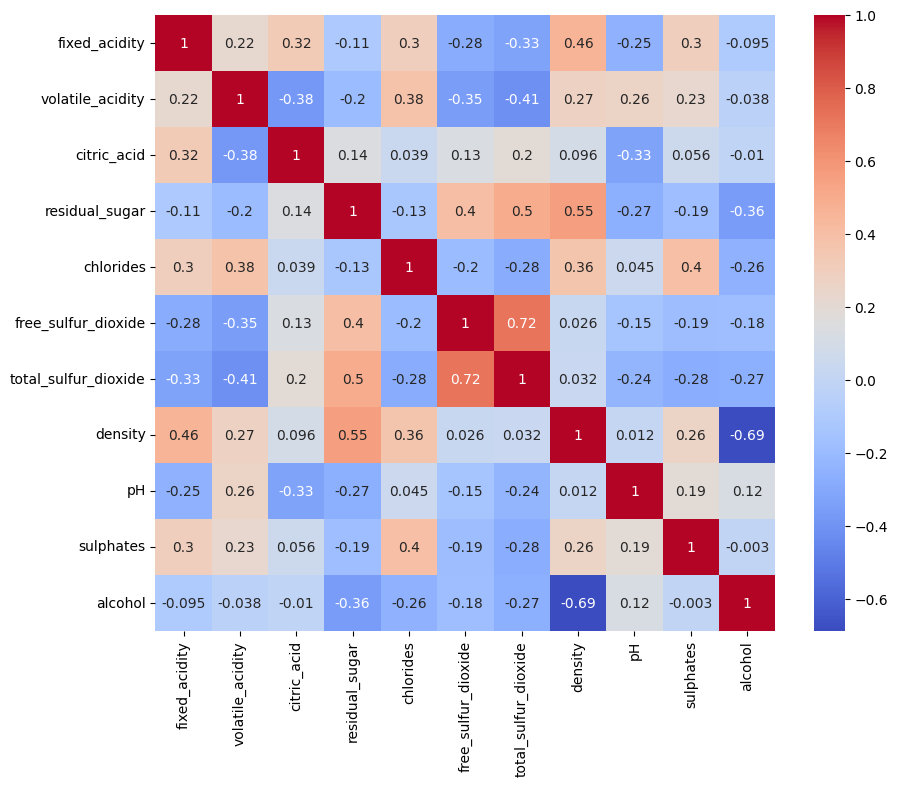

In [ ]:
sns.pairplot(X_scaled_df)
plt.show()

corr_matrix = X_scaled_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

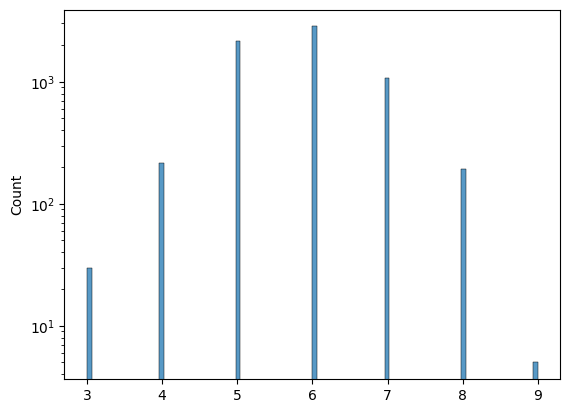

In [ ]:
sns.histplot(y.quality.values,bins=100)
plt.yscale('log')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

X_train

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
3761       2.070989          0.913197    -0.609973       -0.639680   0.883966   
3740       0.373895         -0.362438     0.215866        2.071864  -0.000967   
1359       3.382379          0.822080     0.559966       -0.849877   0.998151   
1230       0.373895         -0.969884     0.147046       -0.576620   0.284496   
4751       0.296754         -0.544672     6.272023       -0.177246  -0.600437   
...             ...               ...          ...             ...        ...   
3772       0.296754         -0.119460     1.798725        2.376650  -0.172244   
5191      -1.246058         -0.362438    -0.334694       -0.324384  -0.372068   
5226      -0.628933          0.184263    -0.816433        0.032951   1.740353   
5390      -0.551792         -0.483928     1.248165        0.537425  -0.143698   
860       -0.011808          1.702876    -1.779913       -0.576620   0.598504   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
3761            -0.649386             -0.013174  0.034473 -2.789621   
3740             0.026746              0.022213  1.702006  0.320319   
1359            -1.381861             -1.552520  0.781528 -0.923657   
1230            -0.874763             -1.021711  0.001123  0.942306   
4751             1.153631              3.153986 -1.506327 -1.172452   
...                   ...                   ...       ...       ...   
3772             0.702877              0.836120  1.735356 -0.426067   
5191             1.209975              0.747652 -0.892675  0.817909   
5226             1.717074              1.189993 -0.035563  0.133722   
5390             0.871910              1.437704  0.221237 -0.239471   
860             -0.874763             -0.543983  0.921601  1.813090   

      sulphates   alcohol colors  
3761  -0.613385 -0.915464  white  
3740  -0.210144 -0.747766  white  
1359   0.797958 -0.384420    red  
1230   1.671647  1.096912    red  
4751  -0.680592  2.186949  white  
...         ...       ...    ...  
3772   0.058683 -1.083162  white  
5191  -0.613385  0.174573  white  
5226  -0.680592 -0.831615  white  
5390  -0.411765 -0.831615  white  
860    0.058683 -0.831615    red  

[4547 rows x 12 columns]

In [ ]:
X_test

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
3103      -0.166089         -1.030629     2.899845        1.546371  -0.314975   
1419       0.373895          1.824366    -0.747613       -0.681719   0.598504   
4761      -0.320370          0.305752     0.147046        0.411306  -1.028631   
4690      -0.706073         -0.362438     1.041706        1.210056  -0.457706   
4032       0.142473          0.062773    -0.816433        1.777588  -0.058059   
...             ...               ...          ...             ...        ...   
4294      -1.168917         -0.666161    -0.265874        0.884250  -0.885900   
3757       0.142473         -0.969884    -0.334694       -0.870896  -0.229336   
5954      -0.628933         -0.180205    -0.265874       -0.618660  -0.486252   
4418      -0.937495         -0.787650     0.147046       -0.723758  -0.400614   
6182      -0.628933         -0.666161     0.353506        0.516405  -0.172244   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
3103            -0.367664              0.181456 -0.165631  0.258120   
1419             0.083090              0.305311  0.301278  0.320319   
4761             0.421155              0.305311 -0.859324 -0.239471   
4690             1.717074              1.189993  0.408001 -0.612663   
4032             1.829762              2.003900  1.395180 -0.674862   
...                   ...                   ...       ...       ...   
4294            -0.254976              0.092988 -0.732592  0.382517   
3757            -0.254976             -0.190111 -0.232332  1.875288   
5954             0.195778              0.376086 -1.746451  0.009325   
4418             1.829762              0.128375 -1.392935  1.377698   
6182             1.660729              0.606103  0.061154 -2.229832   

      sulphates   alcohol colors  
3103  -1.016626  1.432308  white  
1419  -0.546178 -0.496219    red  
4761  -0.613385  1.264610  white  
4690  -0.142937 -0.831615  white  
4032  -0.210144 -1.334709  white  
...         ...       ...    ...  
4294  -1.016626  0.677667  white  
3757   0.865165  0.090724  white  
5954  -1.016626  1.851553  white  
4418  -0.747799  0.761516  white  
6182  -0.277351 -0.999313  white  

[1950 rows x 12 columns]

In [ ]:
y_train.quality.values

array([6, 5, 6, ..., 5, 5, 5])

modelo bayesiano

In [ ]:
df = X_train
fixed_acidity_train = df['fixed_acidity'].values
volatile_acidity_train = df['volatile_acidity'].values
citric_acid_train = df['citric_acid'].values
residual_sugar_train = df['residual_sugar'].values
chlorides_train = df['chlorides'].values
free_sulfur_dioxide_train = df['free_sulfur_dioxide'].values
total_sulfur_dioxide_train = df['total_sulfur_dioxide'].values
density_train = df['density'].values
pH_train = df['pH'].values
sulphates_train = df['sulphates'].values
alcohol_train = df['alcohol'].values
colors_train = df['colors'].values

In [ ]:
coords = {"colors":np.unique(colors_train)}
colors_idx = pd.Categorical(colors_train, categories=['red', 'white']).codes
with pm.Model(coords=coords) as regression_h_2:
  betas = pm.Normal("betas",0,1,shape=(11,2))
  alpha = pm.Normal("alpha",0,1,dims="colors")
  eps = pm.HalfNormal("eps",1)

  mu = alpha[colors_idx] + (betas[0][colors_idx] * fixed_acidity_train +
                betas[1][colors_idx] * volatile_acidity_train +
                betas[2][colors_idx] * citric_acid_train +
                betas[3][colors_idx] * residual_sugar_train +
                betas[4][colors_idx] * chlorides_train +
                betas[5][colors_idx] * free_sulfur_dioxide_train +
                betas[6][colors_idx] * total_sulfur_dioxide_train +
                betas[7][colors_idx] * density_train +
                betas[8][colors_idx] * pH_train +
                betas[9][colors_idx] * sulphates_train +
                betas[10][colors_idx] * alcohol_train)

  likelihood = pm.Normal("likelihood",mu,eps,observed=y_train.quality.values)

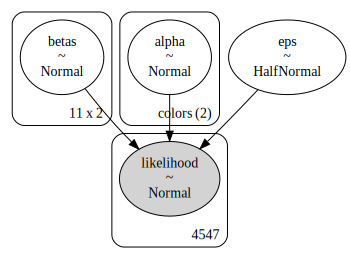

In [ ]:
pm.model_to_graphviz(regression_h_2)

analise preditiva a priori

In [ ]:
with regression_h_2:
  trace_priori = pm.sample_prior_predictive()

array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


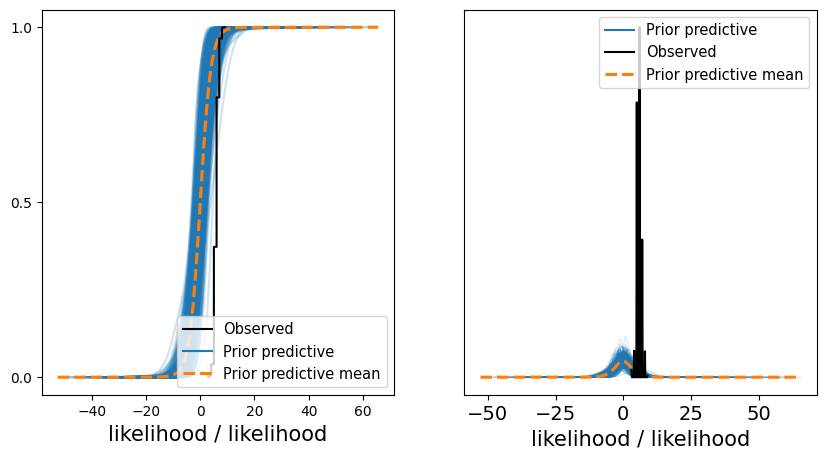

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_priori, group='prior',ax=axes[1])

aprendizado dos parâmetros

In [ ]:
with regression_h_2:
  trace_reg_h_2 = pm.sample()
pm.summary(trace_reg_h_2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0]   0.079  0.045  -0.007    0.167      0.001    0.001    1206.0   
betas[0, 1]   0.081  0.033   0.018    0.138      0.001    0.001    1308.0   
betas[1, 0]  -0.197  0.028  -0.248   -0.142      0.001    0.000    2101.0   
betas[1, 1]  -0.308  0.022  -0.347   -0.267      0.000    0.000    2106.0   
betas[2, 0]  -0.052  0.031  -0.114    0.003      0.001    0.001    2099.0   
betas[2, 1]  -0.001  0.017  -0.032    0.029      0.000    0.000    2738.0   
betas[3, 0]   0.133  0.094  -0.040    0.313      0.002    0.002    1639.0   
betas[3, 1]   0.357  0.043   0.275    0.439      0.001    0.001    1006.0   
betas[4, 0]  -0.029  0.022  -0.068    0.014      0.000    0.000    2121.0   
betas[4, 1]  -0.008  0.023  -0.054    0.032      0.000    0.000    2417.0   
betas[5, 0]   0.034  0.052  -0.061    0.136      0.001    0.001    2005.0   
betas[5, 1]   0.096  0.018   0.061    0.129      0.000    0.000    1857.0   
betas[6, 0]  -0.139  0.057  -0.241   -0.029      0.001    0.001    1826.0   
betas[6, 1]  -0.054  0.025  -0.101   -0.008      0.001    0.000    1876.0   
betas[7, 0]  -0.136  0.087  -0.289    0.033      0.002    0.002    1308.0   
betas[7, 1]  -0.375  0.068  -0.498   -0.243      0.002    0.002     989.0   
betas[8, 0]  -0.051  0.042  -0.130    0.025      0.001    0.001    1371.0   
betas[8, 1]   0.103  0.020   0.063    0.139      0.001    0.000    1501.0   
betas[9, 0]   0.132  0.024   0.091    0.178      0.000    0.000    2445.0   
betas[9, 1]   0.101  0.017   0.068    0.133      0.000    0.000    2595.0   
betas[10, 0]  0.351  0.042   0.265    0.422      0.001    0.001    1584.0   
betas[10, 1]  0.267  0.034   0.204    0.330      0.001    0.001    1182.0   
alpha[red]    5.759  0.092   5.588    5.940      0.002    0.002    1747.0   
alpha[white]  5.669  0.025   5.619    5.711      0.001    0.000    1695.0   
eps           0.733  0.008   0.719    0.747      0.000    0.000    2553.0   

              ess_tail  r_hat  
betas[0, 0]     1239.0    1.0  
betas[0, 1]     1359.0    1.0  
betas[1, 0]     1581.0    1.0  
betas[1, 1]     1413.0    1.0  
betas[2, 0]     1554.0    1.0  
betas[2, 1]     1584.0    1.0  
betas[3, 0]     1209.0    1.0  
betas[3, 1]     1188.0    1.0  
betas[4, 0]     1339.0    1.0  
betas[4, 1]     1651.0    1.0  
betas[5, 0]     1384.0    1.0  
betas[5, 1]     1660.0    1.0  
betas[6, 0]     1588.0    1.0  
betas[6, 1]     1665.0    1.0  
betas[7, 0]     1364.0    1.0  
betas[7, 1]     1014.0    1.0  
betas[8, 0]     1386.0    1.0  
betas[8, 1]     1545.0    1.0  
betas[9, 0]     1615.0    1.0  
betas[9, 1]     1605.0    1.0  
betas[10, 0]    1632.0    1.0  
betas[10, 1]    1233.0    1.0  
alpha[red]      1601.0    1.0  
alpha[white]    1508.0    1.0  
eps             1398.0    1.0

analise preditiva a posteriori

In [ ]:
with regression_h_2:
    trace_reg_post_h_2 = pm.sample_posterior_predictive(trace_reg_h_2)

array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


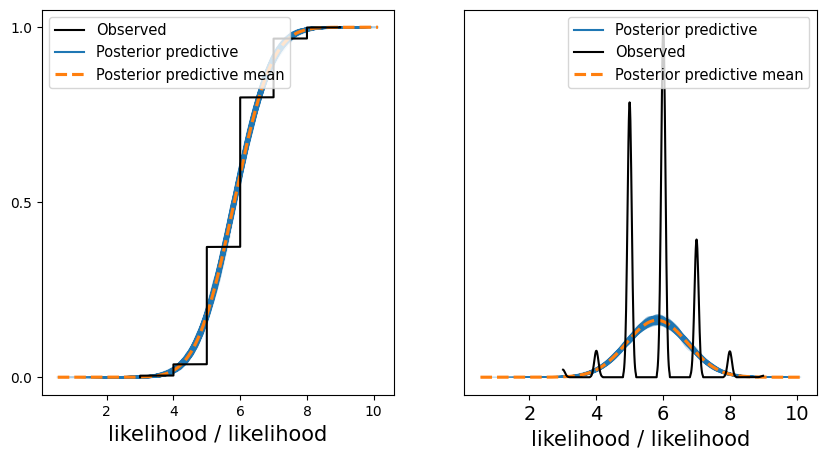

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_reg_post_h_2, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_reg_post_h_2, group='posterior', ax=axes[1])

In [ ]:
with regression_h_2:
    pm.compute_log_likelihood(trace_reg_h_2)

In [ ]:
with pm.Model(coords=coords) as regression_h_2_m:
  f_a = pm.MutableData("f_a", fixed_acidity_train)
  v_a = pm.MutableData("v_a", volatile_acidity_train)
  c_a = pm.MutableData("c_a", citric_acid_train)
  r_s = pm.MutableData("r_s", residual_sugar_train)
  chl = pm.MutableData("chl", chlorides_train)
  f_s_d = pm.MutableData("f_s_d", free_sulfur_dioxide_train)
  t_s_d = pm.MutableData("t_s_d", total_sulfur_dioxide_train)
  den = pm.MutableData("den", density_train)
  pH = pm.MutableData("pH", pH_train)
  sul = pm.MutableData("sul", sulphates_train)
  alc = pm.MutableData("alc", alcohol_train)
  c_i = pm.MutableData("colors", pd.Categorical(colors_train, categories=['red', 'white']).codes)
  y = pm.MutableData("y",y_train.quality.values)
  betas = pm.Normal("betas",0,1,shape=(11,2))
  alpha = pm.Normal("alpha",0,1,dims="colors")
  eps = pm.HalfNormal("eps",1)

  mu = alpha[c_i] + (betas[0][c_i] * f_a +
                betas[1][c_i] * v_a +
                betas[2][c_i] * c_a +
                betas[3][c_i] * r_s +
                betas[4][c_i] * chl +
                betas[5][c_i] * f_s_d +
                betas[6][c_i] * t_s_d +
                betas[7][c_i] * den +
                betas[8][c_i] * pH +
                betas[9][c_i] * sul +
                betas[10][c_i] * alc)

  likelihood = pm.Normal("likelihood",mu,eps,observed=y)

In [ ]:
with regression_h_2_m:
  trace_m = pm.sample()

In [ ]:
with pm.Model() as robusta:
  betas = pm.Normal("betas",0,1,shape = 11)
  alpha = pm.Normal("alpha",0,1,)
  eps = pm.HalfNormal("eps",1)

  df = pm.Exponential("df",1)

  mu = alpha + (betas[0] * fixed_acidity_train +
                betas[1] * volatile_acidity_train +
                betas[2] * citric_acid_train +
                betas[3] * residual_sugar_train +
                betas[4] * chlorides_train +
                betas[5] * free_sulfur_dioxide_train +
                betas[6] * total_sulfur_dioxide_train +
                betas[7] * density_train +
                betas[8] * pH_train +
                betas[9] * sulphates_train +
                betas[10] * alcohol_train)

  likelihood = pm.StudentT("likelihood",nu=df,mu=mu,sigma=eps,observed=y_train.quality.values)

In [ ]:
with robusta:
  trace_priori_robusta = pm.sample_prior_predictive()

In [ ]:
with robusta:
  trace_robusta = pm.sample()

pm.summary(trace_robusta)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]   0.107  0.024   0.062    0.152      0.001    0.001    1101.0   
betas[1]  -0.216  0.015  -0.244   -0.188      0.000    0.000    1557.0   
betas[2]  -0.017  0.013  -0.043    0.007      0.000    0.000    2092.0   
betas[3]   0.229  0.028   0.179    0.282      0.001    0.001     936.0   
betas[4]  -0.004  0.014  -0.032    0.020      0.000    0.000    2360.0   
betas[5]   0.124  0.015   0.095    0.150      0.000    0.000    2158.0   
betas[6]  -0.156  0.018  -0.188   -0.122      0.000    0.000    1895.0   
betas[7]  -0.197  0.042  -0.279   -0.120      0.001    0.001     823.0   
betas[8]   0.081  0.017   0.051    0.114      0.000    0.000    1188.0   
betas[9]   0.122  0.014   0.096    0.147      0.000    0.000    1852.0   
betas[10]  0.323  0.023   0.282    0.365      0.001    0.001    1047.0   
alpha      5.807  0.011   5.787    5.826      0.000    0.000    2658.0   
eps        0.636  0.011   0.615    0.656      0.000    0.000    2283.0   
df         7.543  0.789   6.162    9.055      0.017    0.012    2152.0   

           ess_tail  r_hat  
betas[0]     1122.0    1.0  
betas[1]     1467.0    1.0  
betas[2]     1504.0    1.0  
betas[3]     1063.0    1.0  
betas[4]     1480.0    1.0  
betas[5]     1632.0    1.0  
betas[6]     1510.0    1.0  
betas[7]      943.0    1.0  
betas[8]     1157.0    1.0  
betas[9]     1436.0    1.0  
betas[10]    1277.0    1.0  
alpha        1422.0    1.0  
eps          1418.0    1.0  
df           1460.0    1.0

In [ ]:
with robusta:
    trace_robusta_post = pm.sample_posterior_predictive(trace_robusta)

In [ ]:
with robusta:
  pm.compute_log_likelihood(trace_robusta)

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

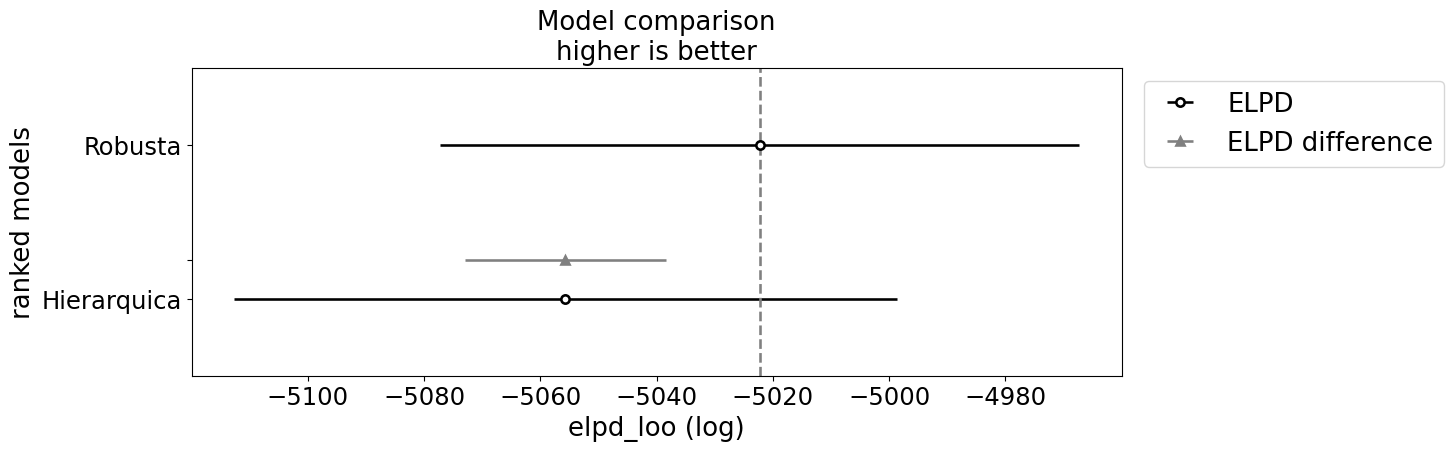

In [ ]:
model_compare = az.compare(
    {
        "Robusta": trace_robusta,

        "Hierarquica": trace_reg_h_2

    }, method='BB-pseudo-BMA'
)
az.plot_compare(model_compare, figsize=(12, 4), insample_dev=False)

In [ ]:
model_compare

rank     elpd_loo      p_loo  elpd_diff   weight         se  \
Robusta         0 -5022.253083  13.958608    0.00000  0.98035  54.974674   
Hierarquica     1 -5055.684543  28.977581   33.43146  0.01965  57.041604   

                   dse  warning scale  
Robusta       0.000000    False   log  
Hierarquica  17.231883     True   log

## 2

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [3]:
auto_mpg.data.original

car_name  cylinders  displacement  horsepower  weight  \
0    chevrolet,chevelle,malibu          8         307.0       130.0    3504   
1            buick,skylark,320          8         350.0       165.0    3693   
2           plymouth,satellite          8         318.0       150.0    3436   
3                amc,rebel,sst          8         304.0       150.0    3433   
4                  ford,torino          8         302.0       140.0    3449   
..                         ...        ...           ...         ...     ...   
393            ford,mustang,gl          4         140.0        86.0    2790   
394                  vw,pickup          4          97.0        52.0    2130   
395              dodge,rampage          4         135.0        84.0    2295   
396                ford,ranger          4         120.0        79.0    2625   
397                 chevy,s-10          4         119.0        82.0    2720   

     acceleration  model_year  origin   mpg  
0            12.0          70       1  18.0  
1            11.5          70       1  15.0  
2            11.0          70       1  18.0  
3            12.0          70       1  16.0  
4            10.5          70       1  17.0  
..            ...         ...     ...   ...  
393          15.6          82       1  27.0  
394          24.6          82       2  44.0  
395          11.6          82       1  32.0  
396          18.6          82       1  28.0  
397          19.4          82       1  31.0  

[398 rows x 9 columns]

analise exploratoria

In [4]:
X

displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3         1  
4         1  
..      ...  
393       1  
394       2  
395       1  
396       1  
397       1  

[398 rows x 7 columns]

In [5]:
y

mpg
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
..    ...
393  27.0
394  44.0
395  32.0
396  28.0
397  31.0

[398 rows x 1 columns]

In [6]:
X_2 = X.dropna()

In [7]:
X_2.isnull().sum()

displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [8]:
import numpy as np
idx_apagar = X[X["horsepower"].isna()].index

In [9]:
y_2 = y[~y.index.isin(idx_apagar)]

In [10]:
y_2

mpg
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
..    ...
393  27.0
394  44.0
395  32.0
396  28.0
397  31.0

[392 rows x 1 columns]

In [11]:
import numpy as np
import pymc as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt

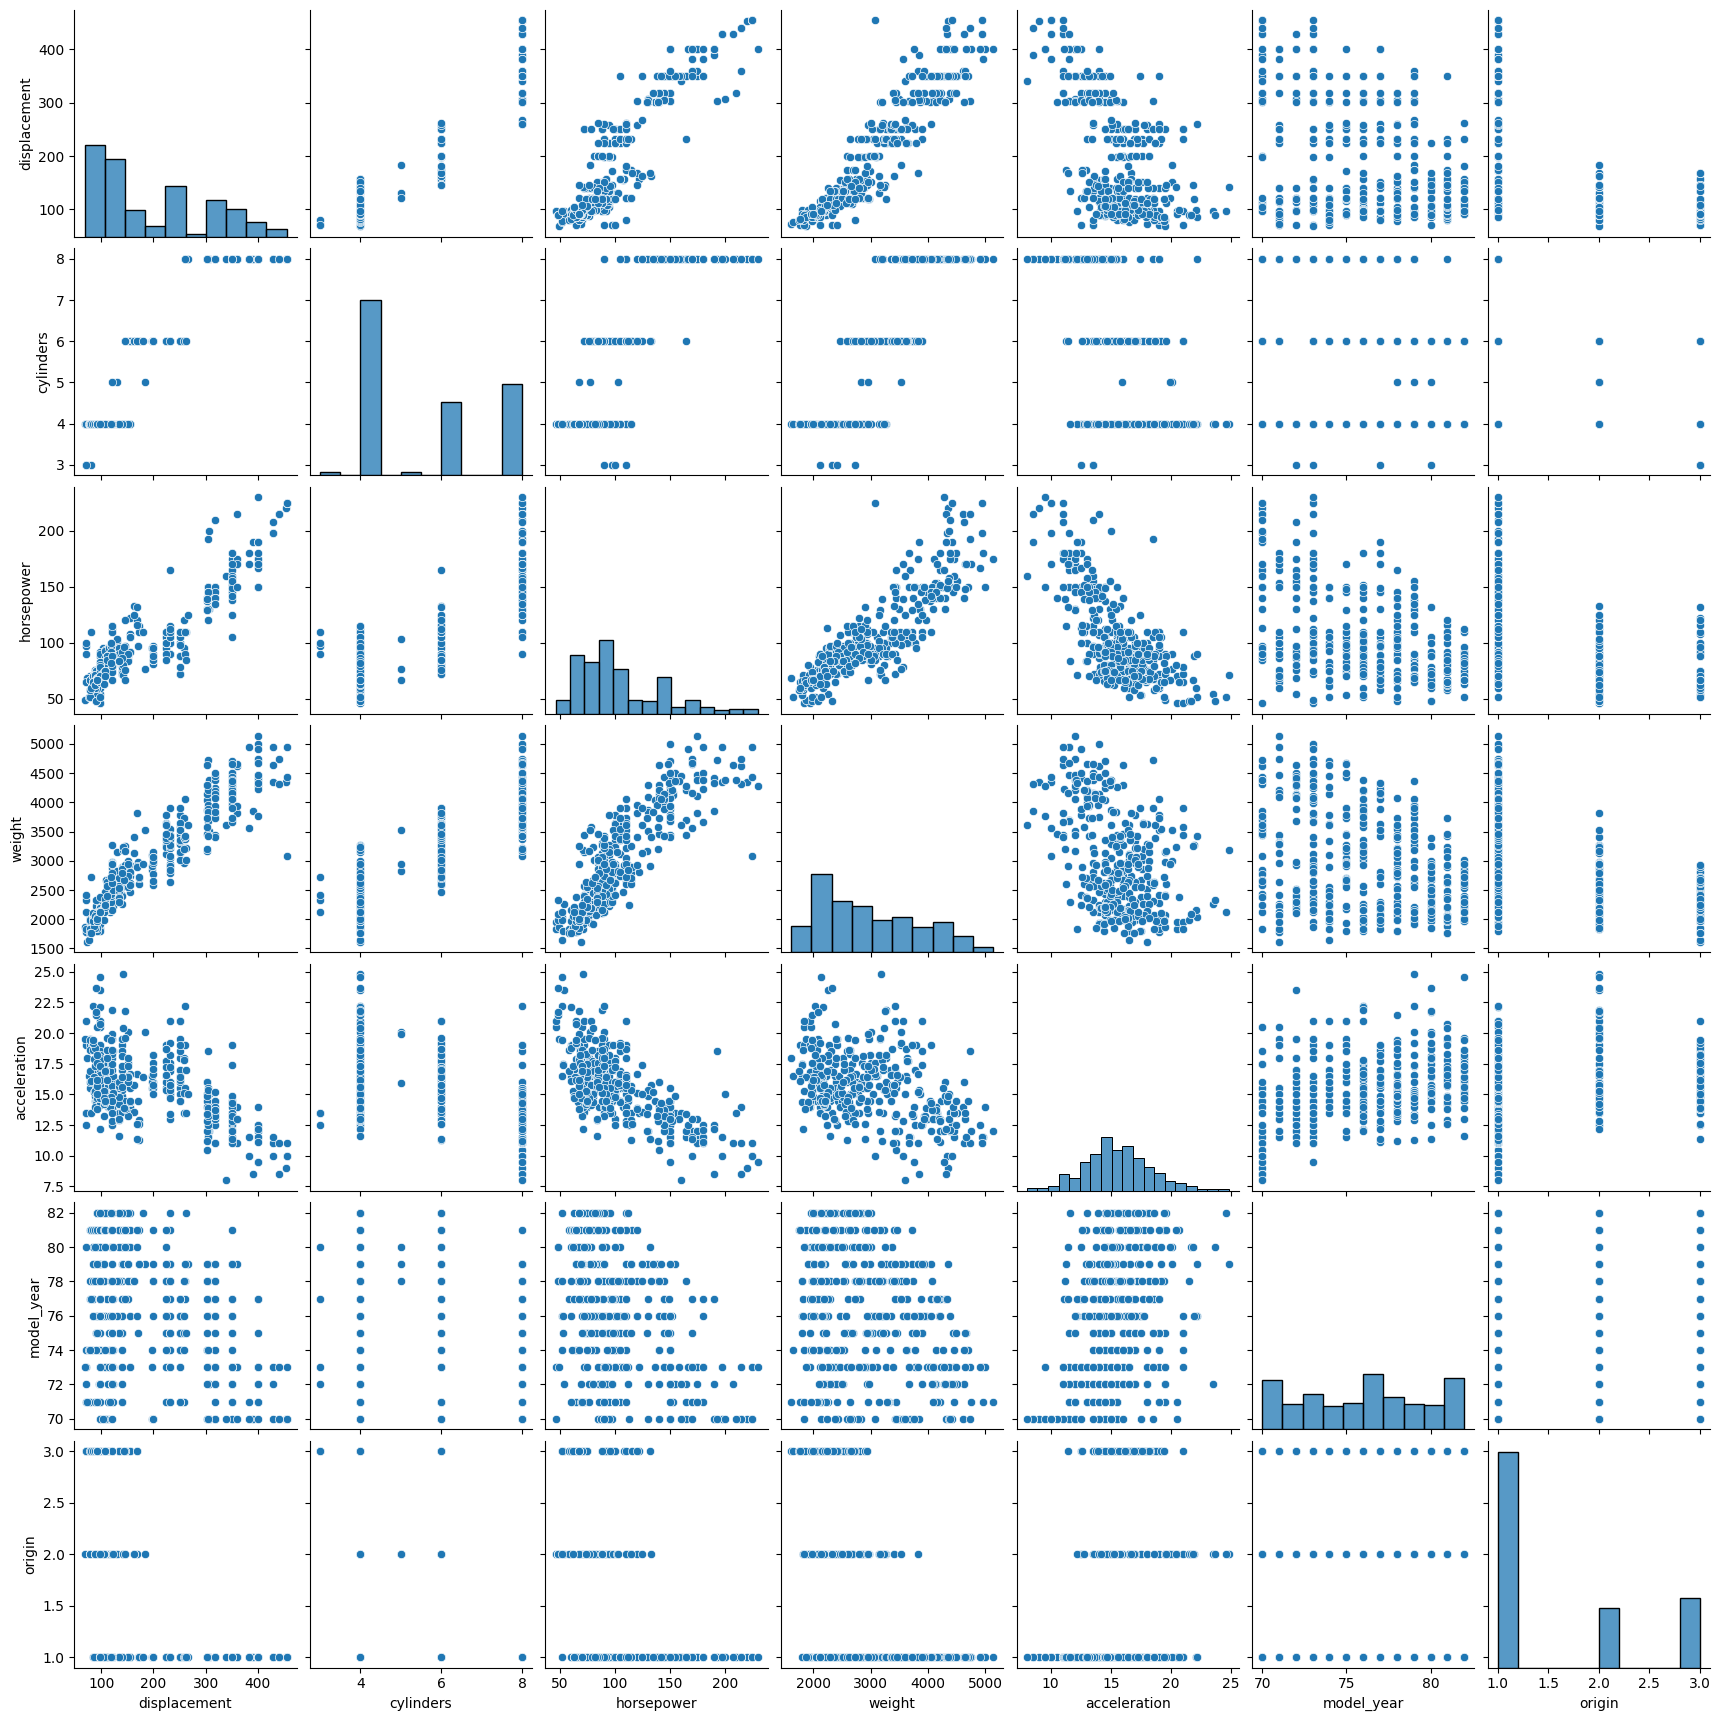

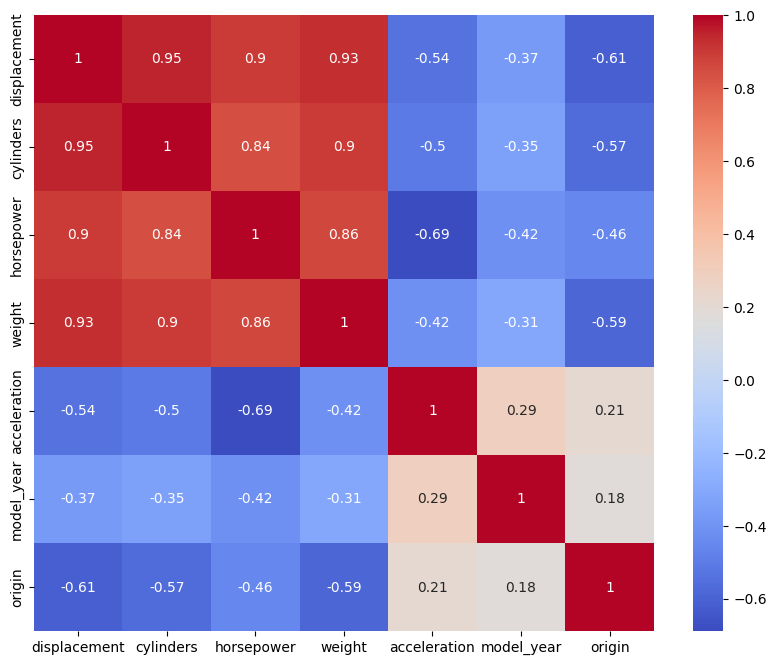

In [12]:
sns.pairplot(X_2)
plt.show()

corr_matrix = X_2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

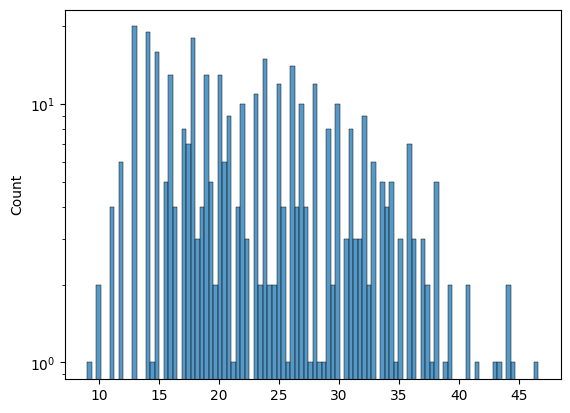

In [13]:
sns.histplot(y.mpg.values,bins=100)
plt.yscale('log')
plt.show()

In [14]:
X_norm = X_2[["displacement", "cylinders", "horsepower", "weight", "acceleration"]]

In [15]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_norm)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_norm.columns)
X_scaled_df["model_year"] = X_2["model_year"]
X_scaled_df["origin"] = X_2["origin"]
print(X_scaled_df.head())

   displacement  cylinders  horsepower    weight  acceleration  model_year  \
0      1.077290   1.483947    0.664133  0.620540     -1.285258        70.0   
1      1.488732   1.483947    1.574594  0.843334     -1.466724        70.0   
2      1.182542   1.483947    1.184397  0.540382     -1.648189        70.0   
3      1.048584   1.483947    1.184397  0.536845     -1.285258        70.0   
4      1.029447   1.483947    0.924265  0.555706     -1.829655        70.0   

   origin  
0     1.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0  


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_2, test_size=0.3, random_state=42)

X_train


displacement  cylinders  horsepower    weight  acceleration  model_year  \
109     -0.826826  -0.864014   -0.272342 -0.705613      0.347933        73.0   
17       0.053468   0.309967   -0.506461 -0.460422      0.166467        70.0   
318     -0.721574  -0.864014   -0.324369 -0.640778     -0.196464        80.0   
24       0.043900   0.309967   -0.376395 -0.388515     -0.196464        70.0   
126      0.531890   0.309967   -0.116263  0.422502      0.529398         NaN   
..            ...        ...         ...       ...           ...         ...   
71       1.048584   1.483947    1.184397  1.077916     -1.103792        72.0   
106      0.359658   0.309967   -0.116263 -0.222304     -0.196464        73.0   
270     -0.415384  -0.864014   -0.506461 -0.144503      0.747157        78.0   
348     -0.922511  -0.864014   -1.026725 -0.704434      1.872244        81.0   
102      1.967153   1.483947    1.184397  2.380493     -0.559396        73.0   

     origin  
109     1.0  
17      1.0  
318     3.0  
24      1.0  
126     NaN  
..      ...  
71      3.0  
106     1.0  
270     3.0  
348     3.0  
102     2.0  

[274 rows x 7 columns]

In [17]:
X_test

displacement  cylinders  horsepower    weight  acceleration  model_year  \
78      -0.941647  -0.864014   -0.922672 -0.929585      0.892329        72.0   
274     -0.702437  -0.864014    0.273935 -0.215231      0.057588        78.0   
246     -0.989490  -0.864014   -1.156791 -1.388139      0.311639        78.0   
55      -0.989490  -0.864014   -0.896659 -1.205425      1.799657        71.0   
387     -0.520637  -0.864014   -0.480448 -0.221125      0.021294        82.0   
..            ...        ...         ...       ...           ...         ...   
79      -0.692868  -0.864014   -0.480448 -0.686752      0.166467        72.0   
310     -1.037332  -0.864014   -1.026725 -1.129982      0.311639        80.0   
352     -0.721574  -0.864014   -0.116263 -0.427415     -0.269051        81.0   
248      1.182542   1.483947    0.924265  0.892844     -0.849741        78.0   
153      0.531890   0.309967   -0.844632  0.212675      1.436726        75.0   

     origin  
78      2.0  
274     2.0  
246     3.0  
55      2.0  
387     1.0  
..      ...  
79      2.0  
310     3.0  
352     1.0  
248     3.0  
153     1.0  

[118 rows x 7 columns]

In [18]:
y_train.mpg.values

array([22. , 21. , 37. , 21. , 15. , 31. , 23. , 24.5, 29. , 30.5, 15. ,
       34.7, 27. , 28. , 19. , 41.5, 17.5, 29. , 26. , 31.8, 18. , 16.5,
       13. , 19. , 30. , 20. , 19. , 27. , 23. , 14. , 20.6, 27.9, 15. ,
       32. , 12. , 23. , 33.5, 25.5, 40.8, 16.5, 32.3, 44.3, 12. , 32.8,
       24. , 18.1, 14. , 13. , 11. , 18. , 32. , 27.2, 16. , 17.5, 12. ,
       26. , 14. , 28. , 20. , 13. , 27.2, 29. , 19.1, 28. , 27. , 19. ,
       26. , 15.5, 13. , 38. , 18. , 23.7, 24.5, 34. , 23. , 26. , 33. ,
       29.5, 15. , 24. , 32. , 14. , 14. , 39.1, 17.5, 17. , 21. , 33. ,
       25.8, 20.3, 24. , 20.2, 23.9, 34. , 20.2, 28.1, 13. , 39.4, 14. ,
       16. , 18.5, 20. , 32. , 18. , 26.5, 16. , 16. , 29. , 10. , 15. ,
       46.6, 20.5, 37. , 17.7, 44.6, 23.5, 31. , 14. , 29.8, 27. , 27. ,
       43.4, 20. , 36. , 20.2, 18. , 27. , 17.6, 18. , 38. , 17. , 18.5,
       14. , 43.1, 16. , 19. , 16. , 15. , 19. ,  9. , 25. , 31. , 26.4,
       27.2, 15.5, 13. , 30. , 21.5, 34.1, 23.9, 25

modelo bayesiano

In [19]:
df = X_train
displacement_train = df['displacement'].values
cylinders_train = df['cylinders'].values
horsepower_train = df['horsepower'].values
weight_train = df['weight'].values
acceleration_train = df['acceleration'].values
model_year_train = df['model_year'].values
origin_train = df['origin'].values

In [20]:
with pm.Model() as regression:
  betas = pm.Normal("betas",0,1,shape=5)
  alpha = pm.Normal("alpha",0,1)
  eps = pm.HalfNormal("eps",1)

  mu = alpha + (betas[0] * displacement_train +
                betas[1] * cylinders_train +
                betas[2] * horsepower_train +
                betas[3] * weight_train +
                betas[4] * acceleration_train)
  likelihood = pm.Normal("likelihood",mu,eps,observed=y_train.mpg.values)

analise preditiva a priori

In [21]:
with regression:
  trace_priori = pm.sample_prior_predictive()

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

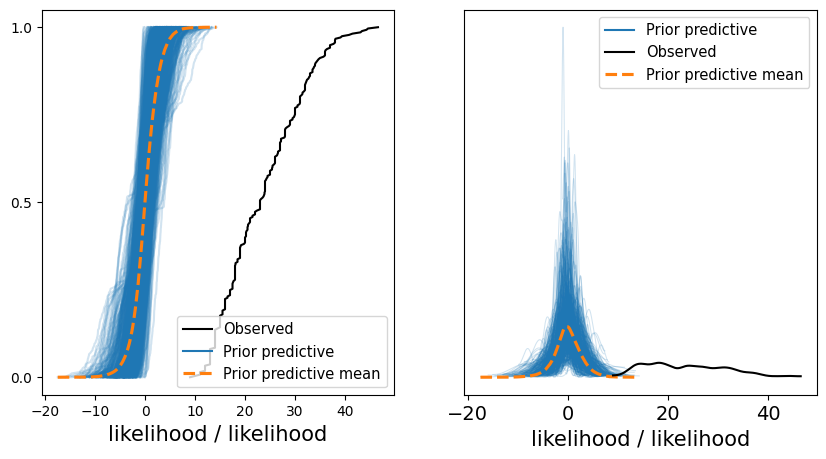

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_priori, group='prior',ax=axes[1])

aprendizado dos parametros

In [23]:
with regression:
  trace_reg = pm.sample()

pm.summary(trace_reg)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]  -1.116  0.695  -2.381    0.206      0.017    0.013    1692.0   
betas[1]  -0.882  0.596  -1.982    0.245      0.014    0.011    1781.0   
betas[2]  -1.966  0.586  -3.039   -0.842      0.014    0.010    1734.0   
betas[3]  -3.063  0.594  -4.186   -2.005      0.015    0.010    1665.0   
betas[4]  -0.127  0.346  -0.733    0.574      0.008    0.007    1773.0   
alpha     22.135  0.298  21.594   22.693      0.007    0.005    1848.0   
eps        4.418  0.209   4.033    4.810      0.005    0.004    1762.0   

          ess_tail  r_hat  
betas[0]    1417.0    1.0  
betas[1]    1340.0    1.0  
betas[2]    1441.0    1.0  
betas[3]    1211.0    1.0  
betas[4]    1373.0    1.0  
alpha       1236.0    1.0  
eps         1270.0    1.0

array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'eps'}>, <Axes: title={'center': 'eps'}>]],
      dtype=object)

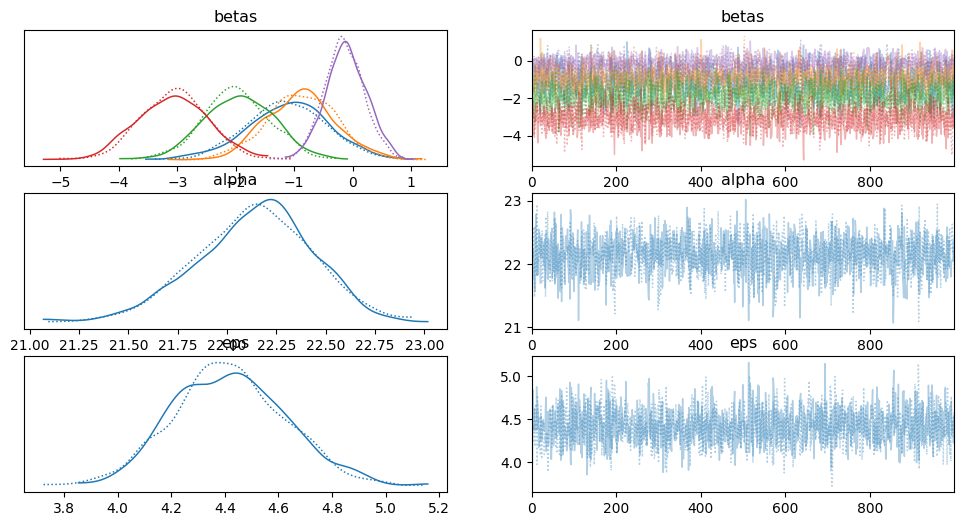

In [24]:
az.plot_trace(trace_reg)

analise preditiva a posteriori

In [25]:
with regression:
    trace_reg_post = pm.sample_posterior_predictive(trace_reg)

array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


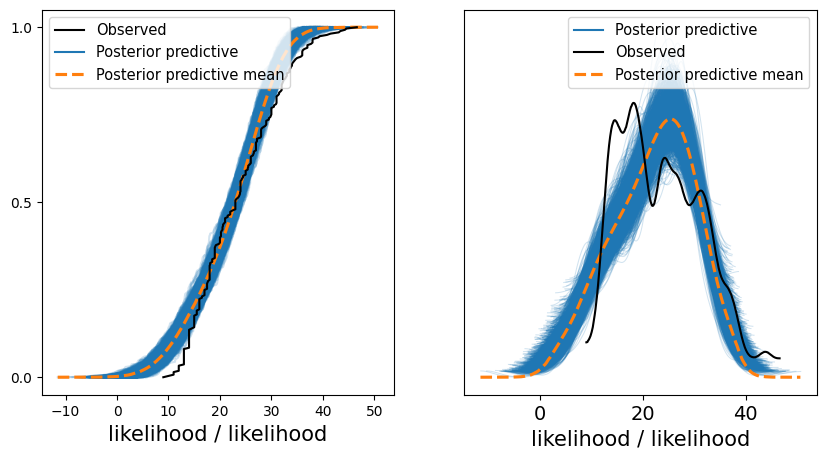

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_reg_post, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_reg_post, group='posterior', ax=axes[1])

 segundo modelo
analise preditiva a priori

In [27]:
coords = {"origin":np.unique(origin_train)}
origin_idx = pd.Categorical(origin_train, categories=[1,2,3]).codes

with pm.Model(coords=coords) as regression_h:
  betas = pm.Normal("betas",0,1,shape=5)
  alpha = pm.Normal("alpha",0,1,dims="origin")
  eps = pm.HalfNormal("eps",1)

  mu = alpha[origin_idx] + (betas[0] * displacement_train +
                betas[1] * cylinders_train +
                betas[2] * horsepower_train +
                betas[3] * weight_train +
                betas[4] * acceleration_train)
  likelihood = pm.Normal("likelihood",mu,eps,observed=y_train.mpg.values)

In [28]:
with regression_h:
  trace_priori = pm.sample_prior_predictive()

array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

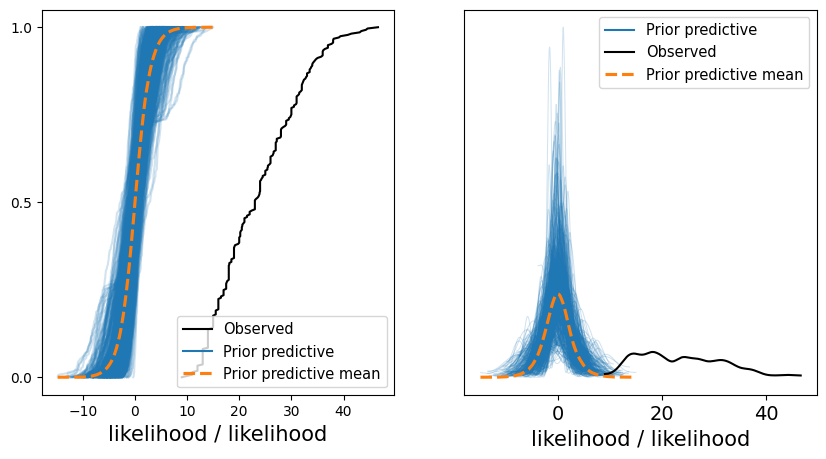

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_priori, group='prior',ax=axes[1])

Posteriori Segundo Modelo


In [30]:
with regression_h:
  trace_reg_h = pm.sample()

pm.summary(trace_reg_h)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]    -1.621  0.876  -3.230    0.002      0.017    0.013    2581.0   
betas[1]    -1.631  0.832  -3.149   -0.128      0.015    0.011    3188.0   
betas[2]    -1.622  0.846  -3.185   -0.052      0.014    0.010    3756.0   
betas[3]    -2.196  0.816  -3.764   -0.717      0.017    0.012    2246.0   
betas[4]     0.152  0.645  -1.067    1.385      0.010    0.014    3952.0   
alpha[1.0]  12.973  0.844  11.372   14.490      0.018    0.013    2268.0   
alpha[2.0]   5.769  0.926   3.994    7.484      0.018    0.013    2732.0   
alpha[3.0]   6.479  0.914   4.606    8.086      0.019    0.013    2351.0   
alpha[nan]   0.799  0.957  -0.837    2.672      0.016    0.018    3750.0   
eps         11.864  0.486  10.992   12.785      0.011    0.008    1859.0   

            ess_tail  r_hat  
betas[0]      1483.0    1.0  
betas[1]      1531.0    1.0  
betas[2]      1610.0    1.0  
betas[3]      1505.0    1.0  
betas[4]      1700.0    1.0  
alpha[1.0]    1654.0    1.0  
alpha[2.0]    1550.0    1.0  
alpha[3.0]    1405.0    1.0  
alpha[nan]    1345.0    1.0  
eps           1849.0    1.0

In [31]:
with regression_h:
  trace_reg_post_h = pm.sample_posterior_predictive(trace_reg_h)

array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


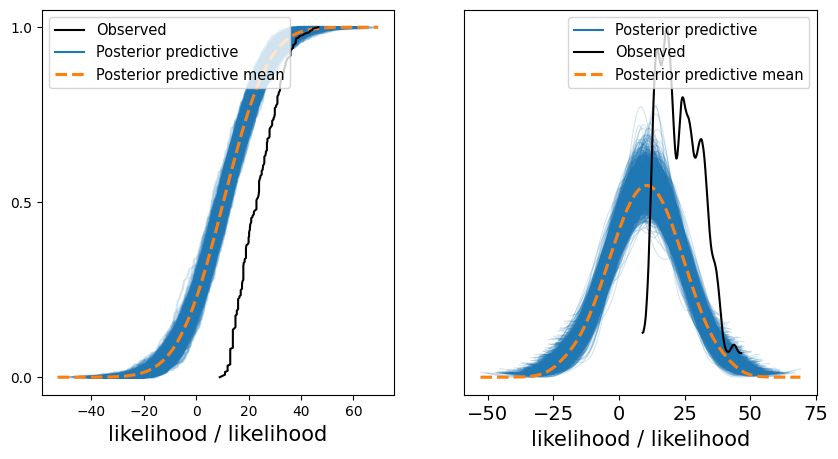

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_reg_post_h, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_reg_post_h, group='posterior', ax=axes[1])

In [33]:
with pm.Model(coords=coords) as regression_h_2:
  betas = pm.Normal("betas",0,1,shape=(5,2))
  alpha = pm.Normal("alpha",0,1,dims="origin")
  eps = pm.HalfNormal("eps",1)


  mu = alpha[origin_idx] + (betas[0][origin_idx]  * displacement_train +
                betas[1][origin_idx] * cylinders_train +
                betas[2][origin_idx] * horsepower_train +
                betas[3][origin_idx] * weight_train  +
                betas[4][origin_idx] * acceleration_train)
  likelihood = pm.Normal("likelihood",mu,eps,observed=y_train.mpg.values)

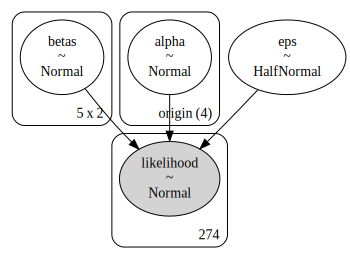

In [34]:
pm.model_to_graphviz(regression_h_2)

Terceiro Modelo Robusta

In [40]:
with pm.Model() as robusta:
  alpha = pm.Normal("a",23,1)
  betas = pm.Normal("betas",0,5,shape=5)

  eps = pm.HalfNormal("eps",1)
  df = pm.Exponential("df",1)

  mu = alpha + (betas[0] * displacement_train +
                betas[1] * cylinders_train +
                betas[2] * horsepower_train +
                betas[3] * weight_train +
                betas[4] * acceleration_train)

  likelihood = pm.StudentT("likelihood",nu=df,mu=mu,sigma=eps,observed=y_train.mpg.values)

analise a priori

In [41]:
with robusta:
  trace_priori_robusta = pm.sample_prior_predictive()

/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:249: RuntimeWarning: divide by zero encountered in scalar power
  out = t - (2 * N * np.pi**0.5 * f) ** (-0.4)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

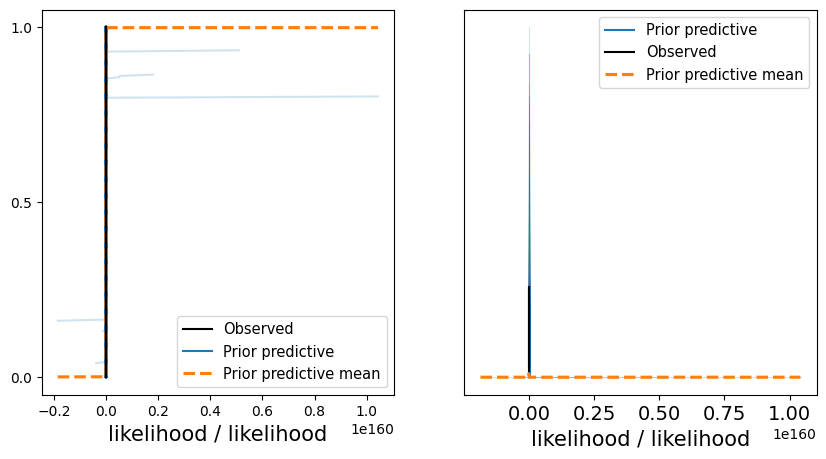

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori_robusta, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_priori_robusta, group='prior',ax=axes[1])

In [43]:
with robusta:
  trace_robusta = pm.sample()

pm.summary(trace_robusta)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a         23.251  0.242  22.807   23.692      0.005    0.004    1969.0   
betas[0]  -1.005  1.044  -2.945    0.975      0.029    0.021    1308.0   
betas[1]  -0.982  0.745  -2.449    0.363      0.018    0.015    1634.0   
betas[2]  -1.716  0.654  -3.085   -0.551      0.017    0.012    1565.0   
betas[3]  -3.293  0.731  -4.689   -1.938      0.020    0.014    1382.0   
betas[4]  -0.417  0.398  -1.092    0.387      0.011    0.009    1216.0   
eps        3.093  0.225   2.680    3.519      0.007    0.005    1174.0   
df         3.725  0.873   2.315    5.413      0.026    0.019    1180.0   

          ess_tail  r_hat  
a           1508.0   1.00  
betas[0]    1314.0   1.00  
betas[1]    1122.0   1.00  
betas[2]    1279.0   1.00  
betas[3]    1431.0   1.00  
betas[4]    1188.0   1.00  
eps         1428.0   1.01  
df          1167.0   1.00

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'eps'}>, <Axes: title={'center': 'eps'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'df'}>]],
      dtype=object)

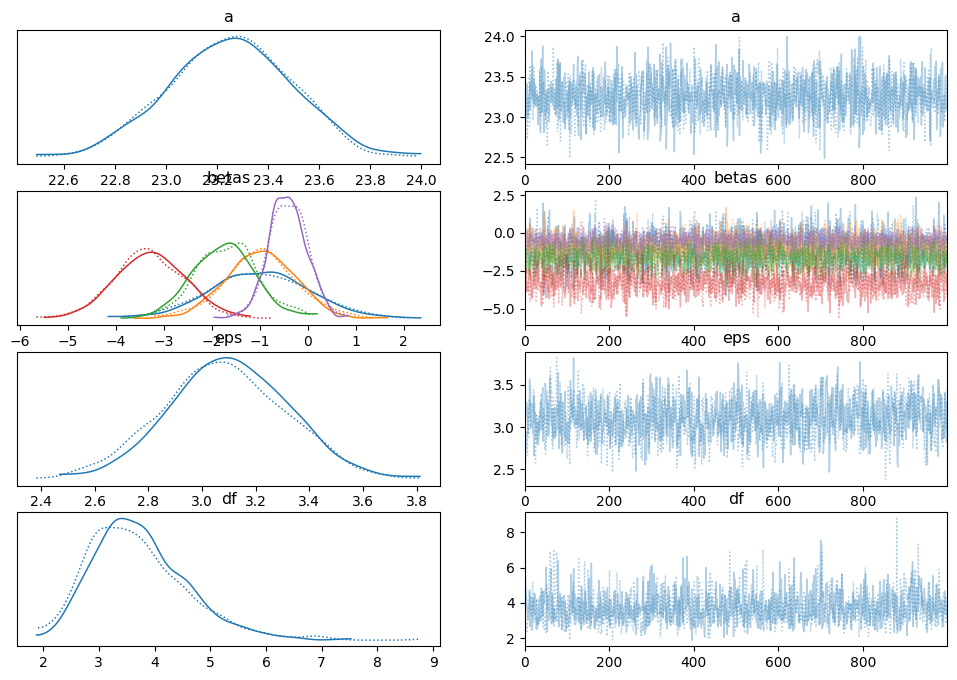

In [44]:
az.plot_trace(trace_robusta)

analise a posteriori

In [45]:
with robusta:
    trace_robusta_post = pm.sample_posterior_predictive(trace_robusta)

array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


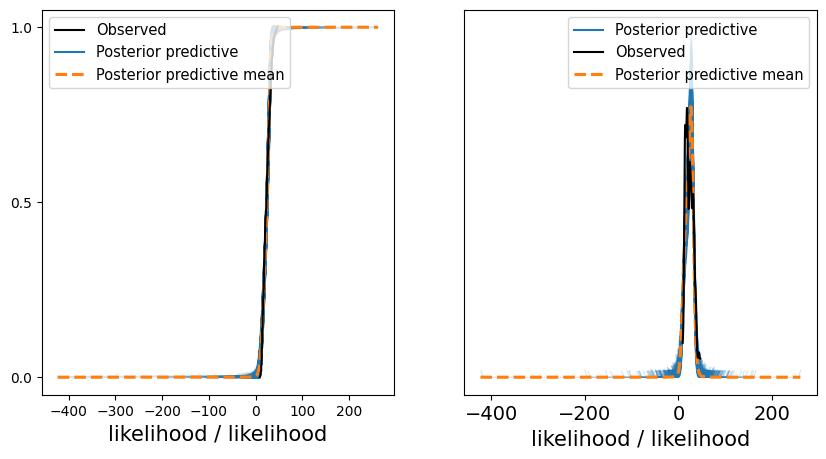

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_robusta_post, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_robusta_post, group='posterior', ax=axes[1])

Comparação

In [47]:
with regression:
    pm.compute_log_likelihood(trace_reg)

with regression_h:
    pm.compute_log_likelihood(trace_reg_h)

with robusta:
    pm.compute_log_likelihood(trace_robusta)

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

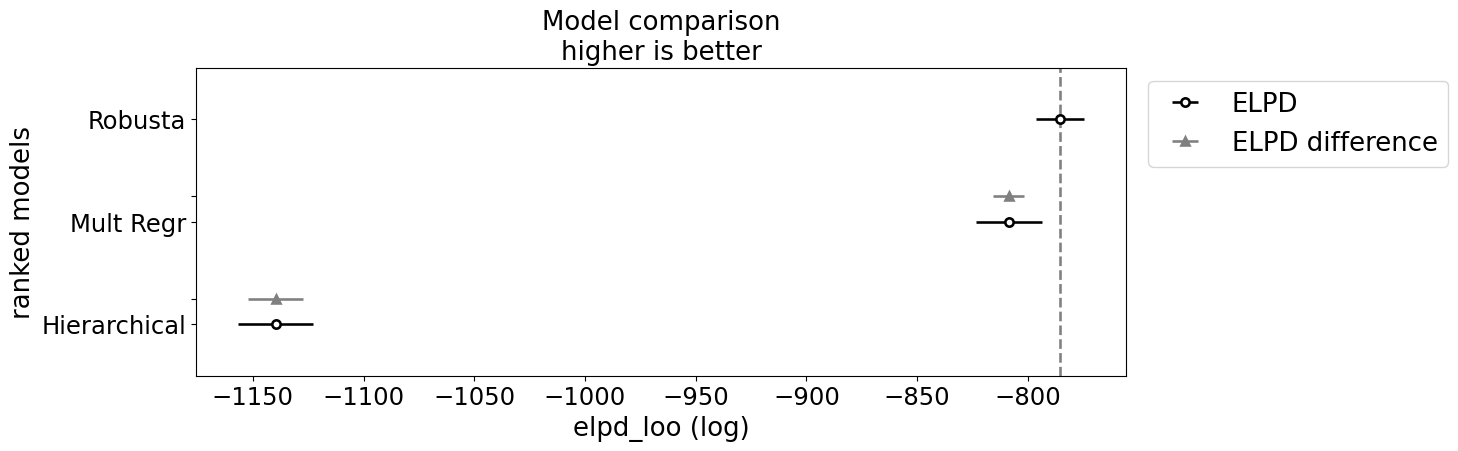

In [48]:
model_compare = az.compare(
    {
        "Mult Regr": trace_reg,
        "Hierarchical": trace_reg_h,
        "Robusta": trace_robusta
    }, method='BB-pseudo-BMA'
)
az.plot_compare(model_compare, figsize=(12, 4), insample_dev=False)

In [49]:
model_compare

rank     elpd_loo     p_loo   elpd_diff         weight  \
Robusta          0  -785.439223  8.873971    0.000000   9.998155e-01   
Mult Regr        1  -808.574598  6.763200   23.135375   1.845473e-04   
Hierarchical     2 -1139.645926  5.468737  354.206703  6.121892e-140   

                     se        dse  warning scale  
Robusta       10.730707   0.000000    False   log  
Mult Regr     14.916815   7.094788    False   log  
Hierarchical  16.953888  12.407262    False   log

In [62]:
with pm.Model(coords=coords) as robusta:
  M_d = pm.MutableData("M_d", displacement_train)
  M_c = pm.MutableData("M_c", cylinders_train)
  M_h = pm.MutableData("M_h", horsepower_train)
  M_w = pm.MutableData("M_w", weight_train)
  M_a = pm.MutableData("M_a", acceleration_train)
  y = pm.MutableData("y",y_train.mpg.values)

  alpha = pm.Normal("alpha",0,1)
  betas = pm.Normal("betas",0,5,shape=5)

  eps = pm.HalfNormal("eps",1)
  df = pm.Exponential("df",1)

  mu = alpha + (betas[0] * displacement_train +
                betas[1] * cylinders_train +
                betas[2] * horsepower_train +
                betas[3] * weight_train +
                betas[4] * acceleration_train)

  likelihood = pm.StudentT("likelihood",nu=df,mu=mu,sigma=eps,observed=y_train.mpg.values)

In [63]:
with robusta:
  trace_m = pm.sample()

In [64]:
with robusta:
    pm.set_data({
        "M_d": X_test.displacement.values,
        "M_c": X_test.cylinders.values,
        "M_h": X_test.horsepower.values,
        "M_w": X_test.weight.values,
        "M_a": X_test.acceleration.values,
        "y": y_test.mpg.values
    })
    trace_post_m = pm.sample_posterior_predictive(trace_m)

In [68]:
preds = trace_post_m.posterior_predictive["likelihood"].mean(["chain","draw"]).to_numpy()

In [69]:
preds

array([26.29271173, 23.69416184, 26.05602933, 23.58005171, 19.69553893,
       28.62878349, 25.43778276, 24.77797218, 28.33197477, 28.19585039,
       19.74536181, 28.47169752, 25.00536034, 26.58111958, 23.58468529,
       28.37052545, 14.94529563, 27.28541674, 26.36916509, 28.50829752,
       20.34359027, 14.53132549, 14.01425918, 18.8432696 , 22.68937164,
       25.39220209, 26.37246202, 24.23900381, 25.36715808,  9.23317144,
       19.6403749 , 24.06437271, 14.67060903, 28.62953254,  9.30112387,
       25.81761046, 28.89446975, 24.99830093, 28.12395382, 11.47966682,
       28.3955319 , 28.38814484,  7.81669561, 29.16711532, 25.73951274,
       18.01151265, 12.76083659, 10.24864496, 14.03696622, 20.81447535,
       29.01505588, 22.29719471, 19.73107978, 18.85607844, 11.76109304,
       26.68929787, 12.75181124, 28.6011201 , 22.36894885, 12.09996641,
       26.29374073, 25.93483389, 19.85451966, 24.93299545, 23.55147792,
       21.60003201, 27.77095484, 12.73680511, 14.0669133 , 21.39

In [72]:
rounded_preds = np.round(preds)

df_predictions = pd.DataFrame({
    'Predicted': rounded_preds,
    'Actual': y_test.mpg.values
})

df_predictions['Abs_Difference'] = np.abs(df_predictions['Predicted'] - df_predictions['Actual'])

print(df_predictions.head())
print(df_predictions['Abs_Difference'].sum())

ValueError: Data must be 1-dimensional